In [1]:
import numpy as np 
import pandas as pd
from pandas.core.dtypes.common import is_numeric_dtype
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [7]:
df = df.drop('laptop_ID',axis = 1)

In [8]:
#y = df[['price_euros']]

In [9]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [11]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


# Preprocessing

In [12]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [13]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [14]:
df_product_price = df.groupby('Company')['Price_euros'].mean()

In [15]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [16]:
df_product_price = pd.DataFrame(data = df_product_price)

df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

In [17]:
df_product_price

,Product Avg Price
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


Text(0.5, 1.0, 'Average Price Per Company')

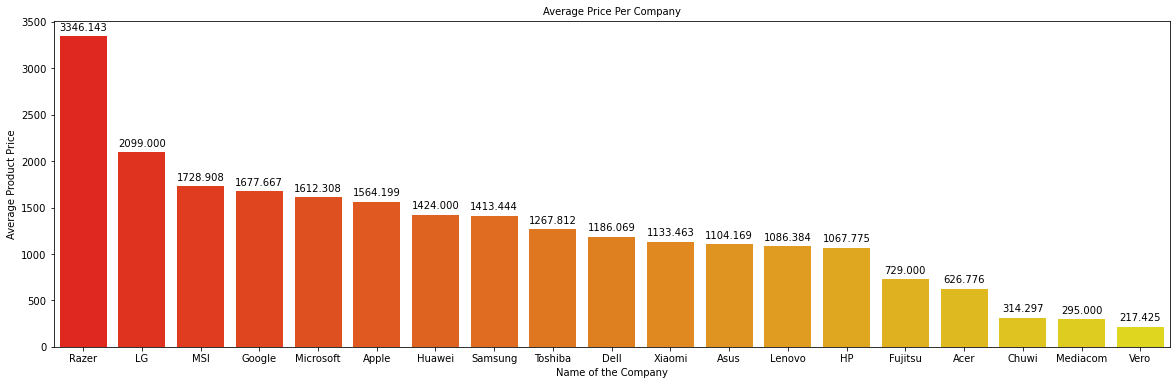

In [21]:
plt.figure(figsize = (20,6))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=10)
plt.ylabel("Average Product Price", size=10)
plt.title('Average Price Per Company',size=10)

In [22]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [23]:
df_productType_wise_price = df.groupby("TypeName")["Price_euros"].mean()
df_productType_wise_price = pd.DataFrame(data = df_productType_wise_price)

df_productType_wise_price.columns = ["Product Price"]
df_productType_wise_price.sort_values(by="Product Price",ascending=False,inplace=True)

Text(0.5, 1.0, 'Product Wise Average Price')

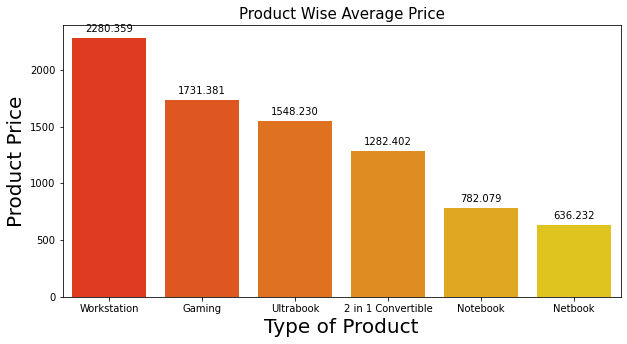

In [30]:
plt.figure(figsize = (10,5))
splot = sns.barplot(data = df_productType_wise_price,x= df_productType_wise_price.index, y = 'Product Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Type of Product", size=20)
plt.ylabel("Product Price", size=20)
plt.title('Product Wise Average Price',size=15)

In [31]:
df.shape

(1303, 12)

In [32]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Encoding


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col]=le.fit_transform(df[col])
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,56,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,50,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,52,4,1.86,575.00
3,1,300,4,15.4,25,85,16,29,8,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,57,8,1.37,1803.60


In [35]:
df.describe()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,6.442824,308.207214,2.582502,15.017191,9.224098,76.983883,8.382195,16.345357,52.755948,4.808903,2.038734,1123.686992
std,4.084128,171.887833,1.245231,1.426304,7.885050,25.190467,5.084665,8.008281,20.576753,1.035253,0.665475,699.009043
min,0.000000,0.000000,0.000000,10.100000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.690000,174.000000
25%,4.000000,182.500000,1.500000,14.000000,6.000000,65.000000,4.000000,10.000000,45.000000,5.000000,1.500000,599.000000
50%,7.000000,291.000000,3.000000,15.600000,8.000000,78.000000,8.000000,16.000000,52.000000,5.000000,2.040000,977.000000
75%,10.000000,455.500000,3.000000,15.600000,15.000000,97.000000,8.000000,23.000000,68.000000,5.000000,2.300000,1487.880000
max,18.000000,617.000000,5.000000,18.400000,39.000000,117.000000,64.000000,38.000000,105.000000,8.000000,4.700000,6099.000000


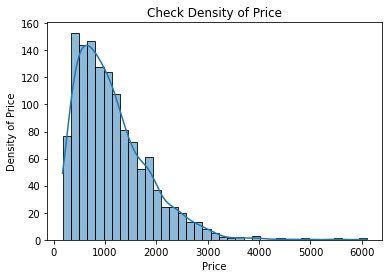

In [36]:
ax=sns.histplot(df['Price_euros'],kde=True)
ax.set_xlabel("Price")
ax.set_ylabel("Density of Price")
ax.set_title("Check Density of Price")
plt.show()

<AxesSubplot:>

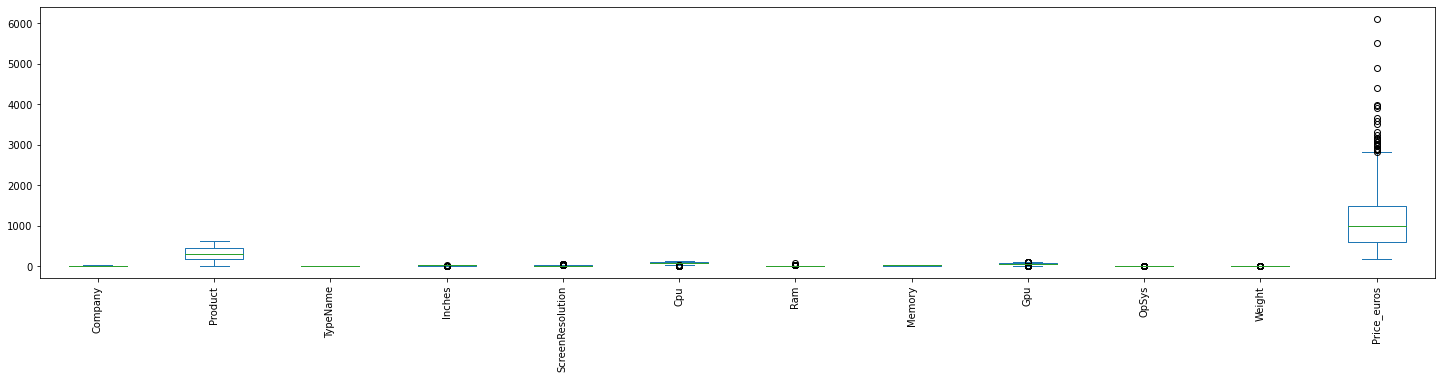

In [38]:
df.plot.box(figsize=(25,5), rot=90)


# Scalling


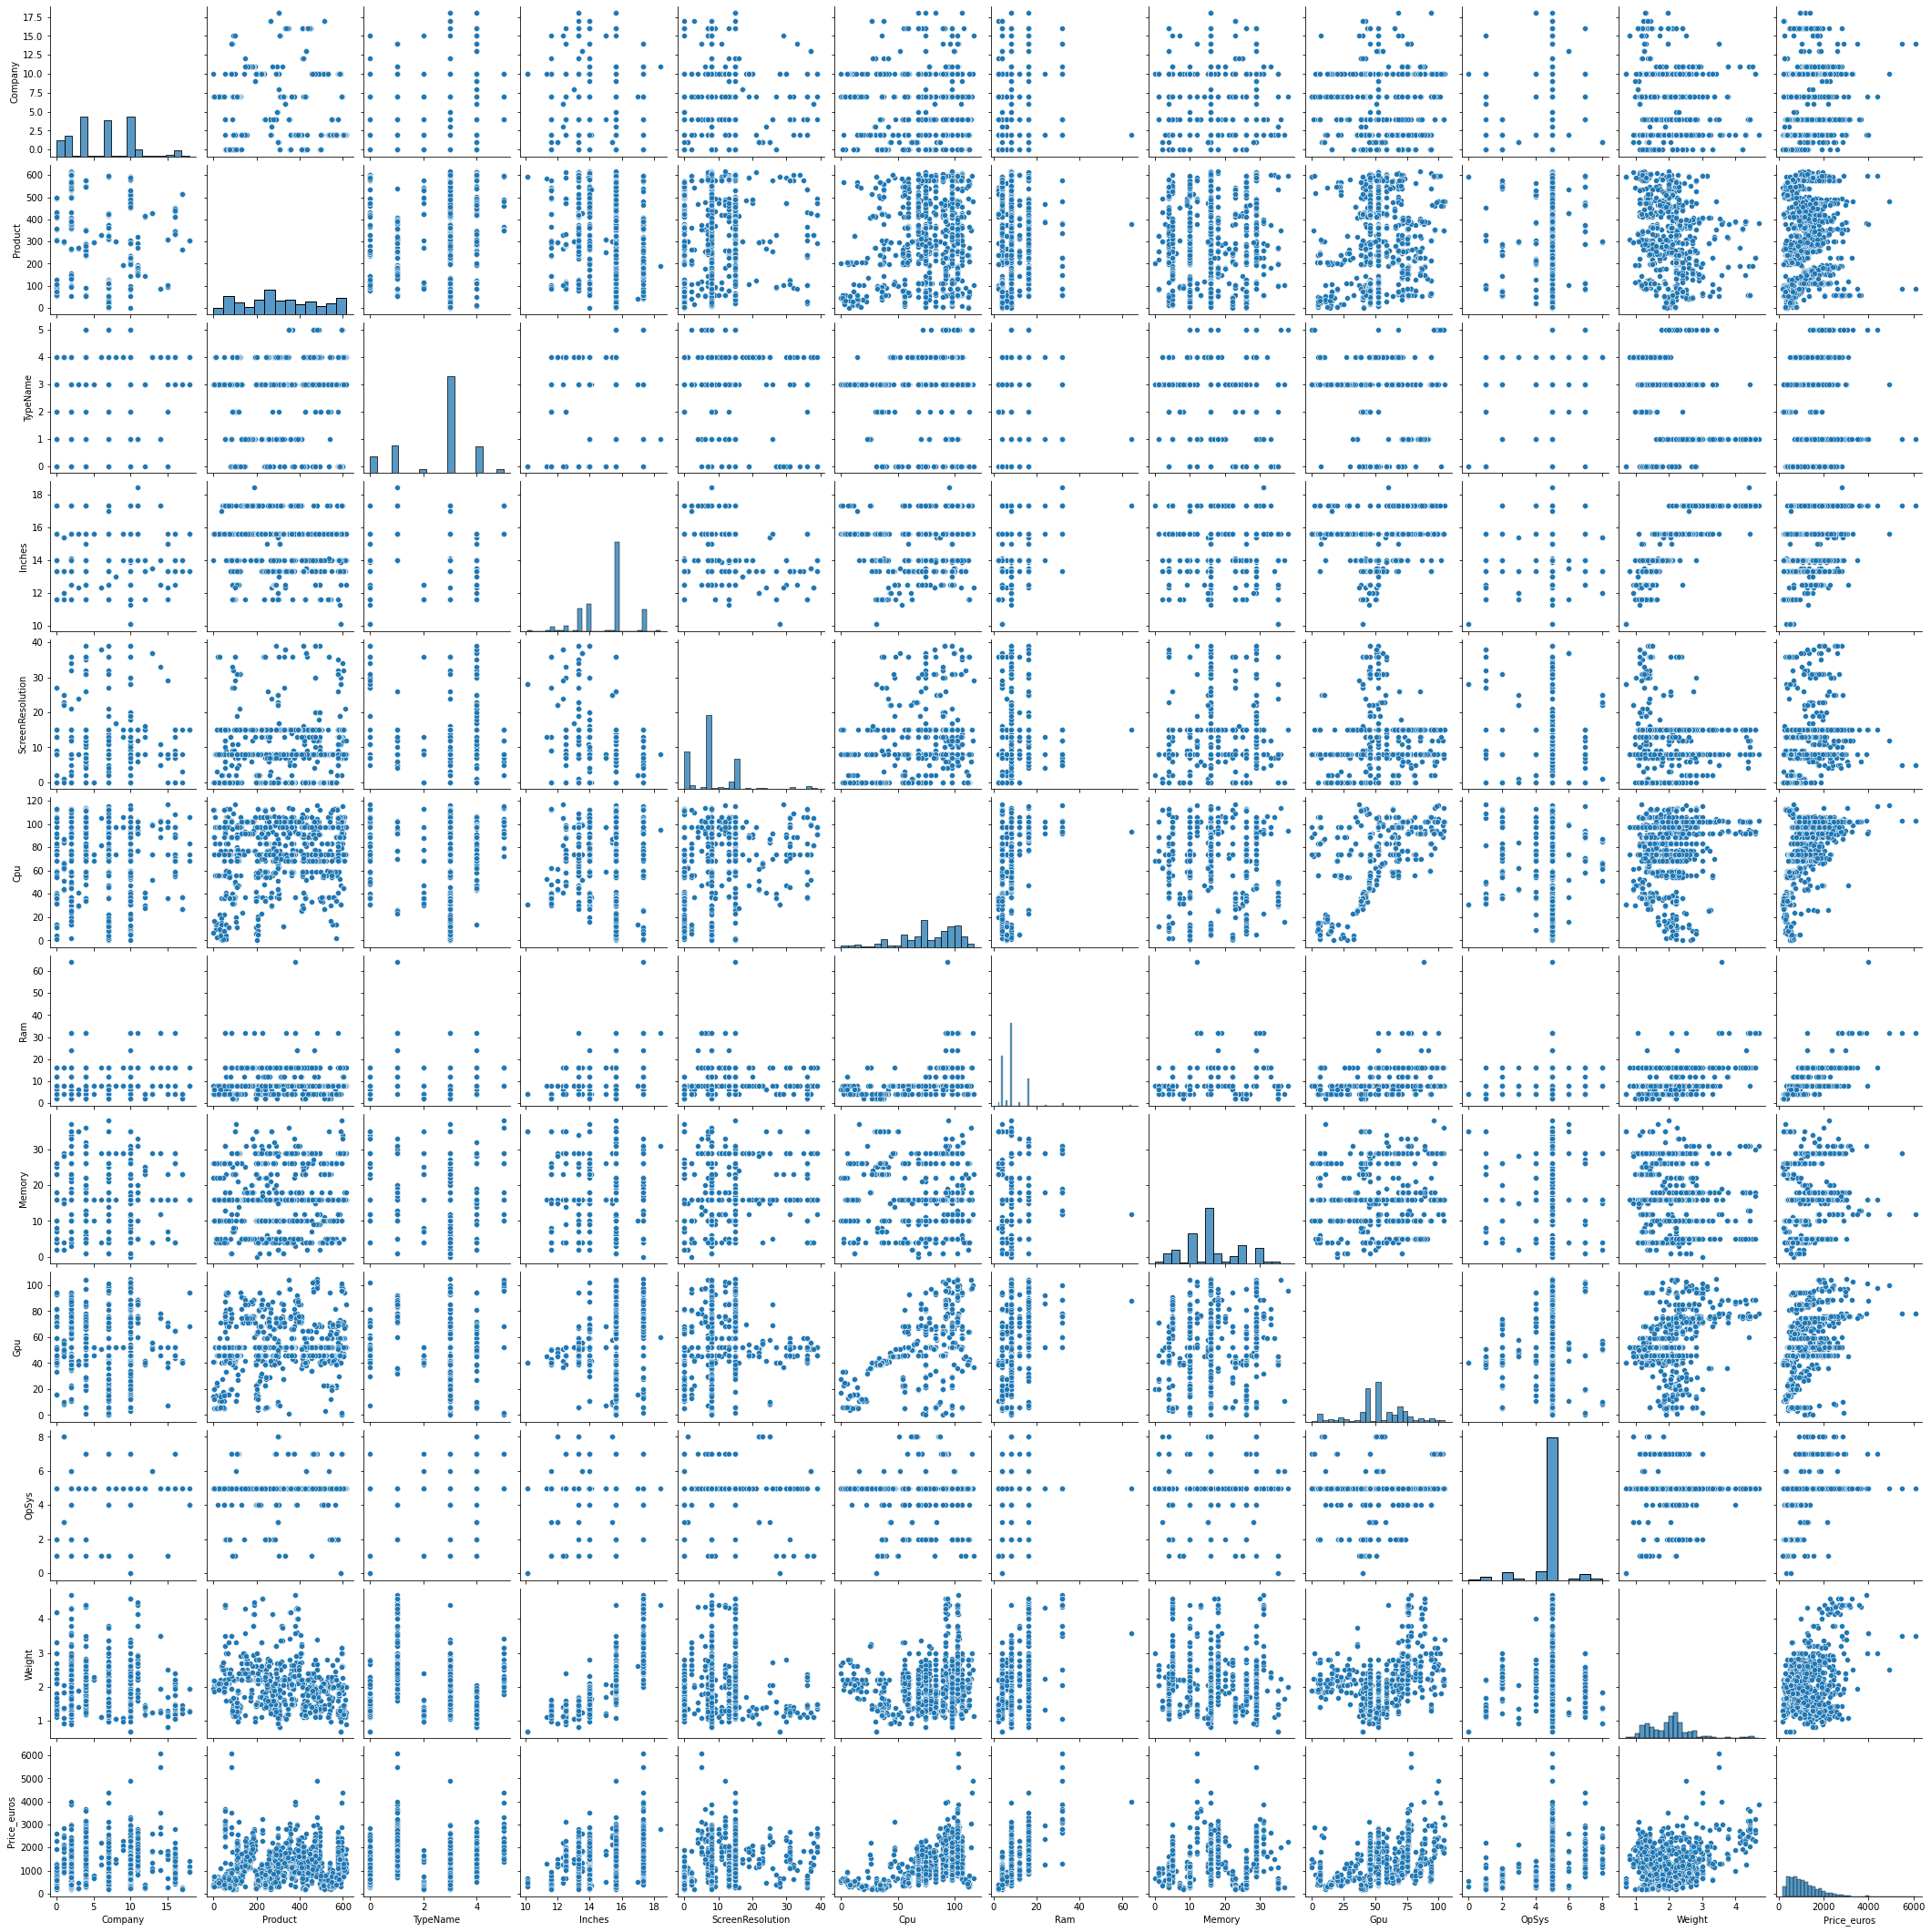

In [39]:
sns.pairplot(df)


<AxesSubplot:>

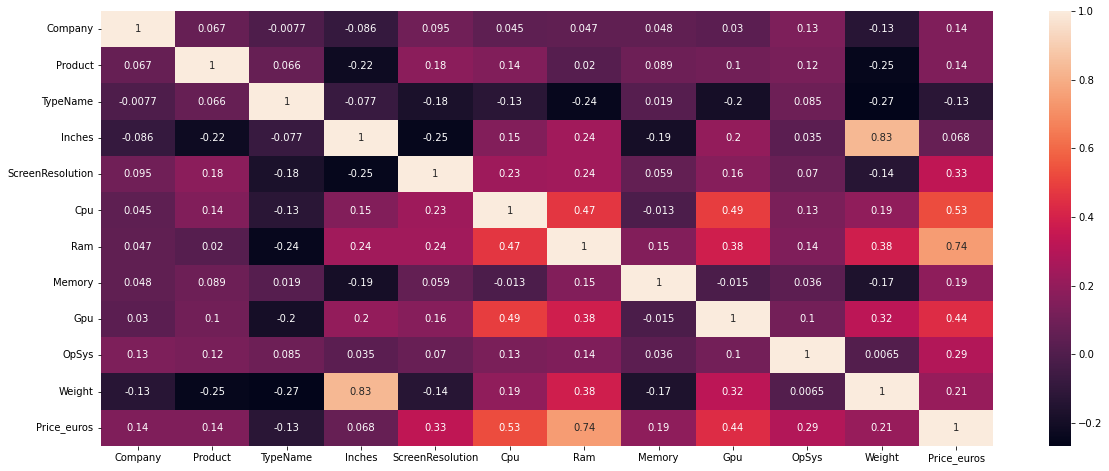

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr(),annot=True)

In [41]:
X=df.drop(df[['Price_euros']],axis=1)
X

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,300,4,13.3,23,65,8,4,56,8,1.37
1,1,301,4,13.3,1,63,8,2,50,8,1.34
2,7,50,3,15.6,8,74,8,16,52,4,1.86
3,1,300,4,15.4,25,85,16,29,8,8,1.83
4,1,300,4,13.3,23,67,8,16,57,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...
1298,10,580,0,14.0,13,89,4,4,46,5,1.80
1299,10,588,0,13.3,19,89,16,29,46,5,1.30
1300,10,196,3,14.0,0,34,2,35,39,5,1.50
1301,7,2,3,15.6,0,89,6,10,20,5,2.19


In [42]:
Y=df[['Price_euros']]
Y

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1298,638.00
1299,1499.00
1300,229.00
1301,764.00


# Train = 80%, Test = 20%


In [43]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=.20, random_state=1)

In [44]:
X_train.shape


(1042, 11)

In [45]:
X_test.shape


(261, 11)

# Linear Regression


In [46]:
from sklearn.linear_model import LinearRegression
lereg=LinearRegression()

In [47]:
lereg.fit(X_train,Y_train)


LinearRegression()

In [48]:
LePredict=lereg.predict(X_test)
LePredict

array([[ 571.75358748],
       [1116.39534697],
       [1955.64795491],
       [1198.52788362],
       [1362.35795033],
       [1155.1537583 ],
       [1174.35377115],
       [ 641.64740327],
       [ 161.24132255],
       [1237.46133358],
       [1239.89332524],
       [1029.989266  ],
       [1365.30611864],
       [1473.17827067],
       [1226.45446729],
       [1738.34554231],
       [ 919.98293709],
       [1140.62340641],
       [1055.60367503],
       [ 701.09831761],
       [ 921.67351203],
       [ 638.20989307],
       [1968.67612235],
       [1383.53055727],
       [ 630.82619402],
       [1630.50525589],
       [ 631.60017365],
       [1056.15674075],
       [1218.61173113],
       [1335.95191096],
       [2014.9999399 ],
       [ 700.76348779],
       [1148.78400438],
       [1363.82284031],
       [2079.39006463],
       [ 578.12535637],
       [ 686.29365677],
       [ 660.55924379],
       [ 258.9504926 ],
       [1180.67485771],
       [1020.64101372],
       [ 745.408

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [50]:
LR_mse=mean_squared_error(Y_test,LePredict)
LR_mae=mean_absolute_error(Y_test,LePredict)
LR_r2=r2_score(Y_test,LePredict)
print("mean_squared_error \"MSE:\"",LR_mse)
print("mean_absolute_error \"MAE:\"",LR_mae)
print("r2_score:",LR_r2)

mean_squared_error "MSE:" 141910.33034621566
mean_absolute_error "MAE:" 276.2050273827709
r2_score: 0.7114251481452354


In [51]:
lereg_training_score=lereg.score(X_train,Y_train)
lereg_training_score

0.6613023923579975

In [52]:
lereg_testing_score=lereg.score(X_test,Y_test)
lereg_testing_score

0.7114251481452354

# Support Vector Regression (SVR)


In [71]:
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_lr=SVR(C=1.0, epsilon=0.2, kernel='linear')

# Training of the regression model
svr_lr.fit(X_train, Y_train)
svr_pred = svr_lr.predict(X_test)

In [72]:
svr_mse=mean_squared_error(Y_test,svr_pred)
svr_mae=mean_absolute_error(Y_test,svr_pred)
svr_r2=r2_score(Y_test,svr_pred)
print("svr_mean_squared_error \"MSE:\"",svr_mse)
print("svr_mean_absolute_error \"MAE:\"",svr_mae)
print("svr_r2_score:",svr_r2)
svr_training_score=svr_lr.score(X_train,Y_train)
print("svr_training_score: ",svr_training_score)
svr_testing_score=svr_lr.score(X_test,Y_test)
print("svr_testing_score: ",svr_testing_score)

svr_mean_squared_error "MSE:" 153273.83173539242
svr_mean_absolute_error "MAE:" 277.1159055168696
svr_r2_score: 0.6883174524480099
svr_training_score:  0.6432143586581249
svr_testing_score:  0.6883174524480099


# Random Forest Regression


RANDOM FOREST IS THE BEST FOR THIS DATASET

In [60]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=.20, random_state=1)

In [61]:
RFR=RandomForestRegressor()


In [62]:
RFR.fit(X_train,Y_train)


RandomForestRegressor()

In [63]:
RFR_pred=RFR.predict(X_test)


In [64]:
RFR_mse=mean_squared_error(Y_test,RFR_pred)
RFR_mae=mean_absolute_error(Y_test,RFR_pred)
RFR_r2=r2_score(Y_test,RFR_pred)
print("RFR_mean_squared_error \"MSE:\"",RFR_mse)
print("RFR_mean_absolute_error \"MAE:\"",RFR_mae)
print("RFR_r2_score:",RFR_r2)

RFR_mean_squared_error "MSE:" 55524.27324319473
RFR_mean_absolute_error "MAE:" 146.14605883962778
RFR_r2_score: 0.8870913140262049


In [65]:
RFR_training_score=RFR.score(X_train,Y_train)
RFR_training_score

0.9770003067618006

In [66]:
RFR_testing_score=RFR.score(X_test,Y_test)
RFR_testing_score

0.8870913140262049

# Apply KNN Regressor:


In [53]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=.35, random_state=1)

In [54]:
knn=KNeighborsRegressor(n_neighbors=2)


In [55]:
knn.fit(X_train,Y_train)


KNeighborsRegressor(n_neighbors=2)

In [56]:
knn_pred=knn.predict(X_test)
knn_pred

array([[1829.5  ],
       [ 729.   ],
       [1324.   ],
       [ 884.   ],
       [2199.   ],
       [1038.   ],
       [ 589.5  ],
       [ 879.   ],
       [ 289.   ],
       [1444.5  ],
       [1334.   ],
       [1112.5  ],
       [2424.   ],
       [1438.   ],
       [1179.5  ],
       [1458.5  ],
       [1054.5  ],
       [1471.   ],
       [1595.   ],
       [1727.   ],
       [ 754.   ],
       [ 643.9  ],
       [1483.5  ],
       [1554.   ],
       [1029.   ],
       [1307.62 ],
       [ 559.725],
       [ 564.   ],
       [ 624.   ],
       [1049.   ],
       [2813.495],
       [ 669.5  ],
       [1224.3  ],
       [1659.5  ],
       [2224.   ],
       [1074.   ],
       [ 805.99 ],
       [ 508.5  ],
       [ 504.   ],
       [1072.8  ],
       [1225.   ],
       [ 489.5  ],
       [ 697.25 ],
       [ 777.45 ],
       [1539.45 ],
       [ 568.845],
       [1195.   ],
       [1499.   ],
       [ 710.   ],
       [2126.55 ],
       [1147.   ],
       [1224.   ],
       [1598

In [57]:
knn_mse=mean_squared_error(Y_test,knn_pred)
knn_mae=mean_absolute_error(Y_test,knn_pred)
knn_r2=r2_score(Y_test,knn_pred)
print("KNN_mean_squared_error \"MSE:\"",knn_mse)
print("KNN_mean_absolute_error \"MAE:\"",knn_mae)
print("KNN_r2_score:",knn_r2)

KNN_mean_squared_error "MSE:" 118178.95393052517
KNN_mean_absolute_error "MAE:" 232.34698030634573
KNN_r2_score: 0.7659049051308228


In [58]:
knn_training_score=knn.score(X_train,Y_train)
knn_training_score

0.9084022824203991

In [59]:
knn_testing_score=knn.score(X_test,Y_test)
knn_testing_score

0.7659049051308228

# DecisionTreeRegressor


In [67]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
dtree=DecisionTreeRegressor(max_depth=1)
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=1)

In [68]:
dtree_predict=dtree.predict(X_test)


In [70]:
dtree_mse=mean_squared_error(Y_test,dtree_predict)
dtree_mae=mean_absolute_error(Y_test,dtree_predict)
dtree_r2=r2_score(Y_test,dtree_predict)
print("dtree_mean_squared_error \"MSE:\"",dtree_mse)
print("dtree_mean_absolute_error \"MAE:\"",dtree_mae)
print("dtree_r2_score:",dtree_r2)
dtree_training_score=dtree.score(X_train,Y_train)
print("dtree_training_score: ",dtree_training_score)
dtree_testing_score=dtree.score(X_test,Y_test)
print("dtree_testing_score: ",dtree_testing_score)

dtree_mean_squared_error "MSE:" 292385.5814420046
dtree_mean_absolute_error "MAE:" 414.1764635231836
dtree_r2_score: 0.40543351817131656
dtree_training_score:  0.35890380224223595
dtree_testing_score:  0.40543351817131656


# GaussianProcessRegressor

In [75]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gaussianReg = GaussianProcessRegressor(kernel=kernel,random_state=1)
gaussianReg.fit(X_train, Y_train)

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         random_state=1)

In [76]:
gaussianReg_predict=gaussianReg.predict(X_test)


In [77]:
gaussianReg_mse=mean_squared_error(Y_test,gaussianReg_predict)
gaussianReg_mae=mean_absolute_error(Y_test,gaussianReg_predict)
gaussianReg_r2=r2_score(Y_test,gaussianReg_predict)
print("gaussianReg_mean_squared_error \"MSE:\"",gaussianReg_mse)
print("gaussianReg_mean_absolute_error \"MAE:\"",gaussianReg_mae)
print("gaussianReg_r2_score:",gaussianReg_r2)
gaussianReg_training_score=gaussianReg.score(X_train,Y_train)
print("gaussianReg_training_score: ",gaussianReg_training_score)
gaussianReg_testing_score=gaussianReg.score(X_test,Y_test)
print("gaussianReg_testing_score: ",gaussianReg_testing_score)

gaussianReg_mean_squared_error "MSE:" 266009.1231001498
gaussianReg_mean_absolute_error "MAE:" 402.57710753588316
gaussianReg_r2_score: 0.4590700824713524
gaussianReg_training_score:  0.44864658629721355
gaussianReg_testing_score:  0.4590700824713524


In [78]:
LR_DF = pd.DataFrame({'Algorithm Name': ['LREG r2 score:','KNN r2 score:','RandomForest_r2_score:','DecisionTree_r2_score','SVR_r2_score','LassoRegression_r2_score','GaussianReg_r2_score'], 'Algorithm Score': [LR_r2,knn_r2,RFR_r2,dtree_r2,svr_r2,lassoReg_r2,gaussianReg_r2]})
LR_DF

,Algorithm Name,Algorithm Score
0,LREG r2 score:,0.711425
1,KNN r2 score:,0.765905
2,RandomForest_r2_score:,0.887091
3,DecisionTree_r2_score,0.405434
4,SVR_r2_score,0.688317
5,LassoRegression_r2_score,0.711389
6,GaussianReg_r2_score,0.459070


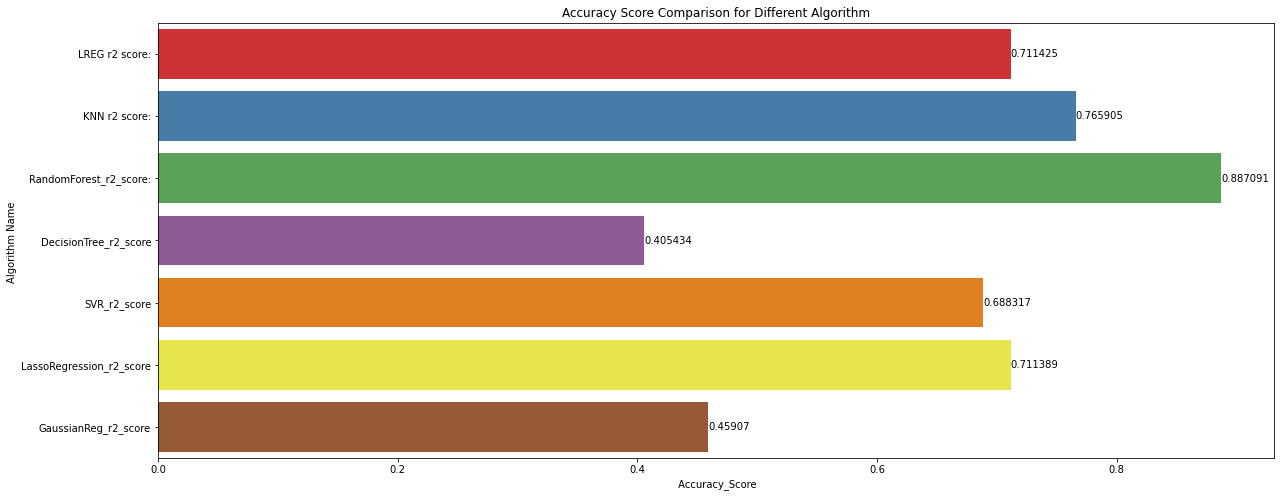

In [80]:
plt.figure(figsize = (20, 8))
ax=sns.barplot(y='Algorithm Name',x='Algorithm Score',data=LR_DF,palette='Set1')
#sns.set(rc = {'figure.figsize':(20, 20)})

ax.set_xlabel( " Accuracy_Score")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm")
ax.bar_label(ax.containers[0])
plt.show()

# Lasso Regression


In [73]:
from sklearn import linear_model

# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train,Y_train)
# Predict
lassoReg_predict=lassoReg.predict(X_test)

In [74]:
lassoReg_mse=mean_squared_error(Y_test,lassoReg_predict)
lassoReg_mae=mean_absolute_error(Y_test,lassoReg_predict)
lassoReg_r2=r2_score(Y_test,lassoReg_predict)
print("lassoReg_mean_squared_error \"MSE:\"",lassoReg_mse)
print("lassoReg_mean_absolute_error \"MAE:\"",lassoReg_mae)
print("lassoReg_r2_score:",lassoReg_r2)
lassoReg_training_score=lassoReg.score(X_train,Y_train)
print("lassoReg_training_score: ",lassoReg_training_score)
lassoReg_testing_score=lassoReg.score(X_test,Y_test)
print("lassoReg_testing_score: ",lassoReg_testing_score)

lassoReg_mean_squared_error "MSE:" 141928.2194977893
lassoReg_mean_absolute_error "MAE:" 276.2198405522962
lassoReg_r2_score: 0.7113887705309168
lassoReg_training_score:  0.6613019275230718
lassoReg_testing_score:  0.7113887705309168
